En este primer ejercicio de pair programming trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas III, ese en el que habíamos eliminado algunas columnas de nuestro csv.

Tendréis que realizar gráficas para contestar a las siguientes preguntas:

1. ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [7]:
df = pd.read_csv('attacks_modificado.csv')
df.head()

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018.06.08,3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018.06.04,4,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,"Tiger shark, 3m",http://sharkattackfile.net/spreadsheets/pdf_di...


In [8]:
# Extraemos el cuenteo de cada categoría
serie_cuentas = df['sex_'].value_counts()

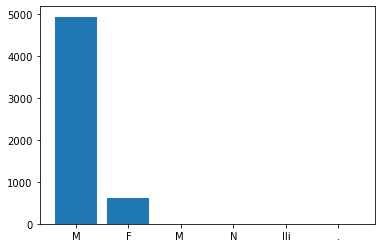

In [9]:
# Creamos el grafico
x = serie_cuentas.index
y = serie_cuentas.values

plt.figure()

plt.bar(x,y)

plt.show()

2. ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct

In [10]:
y1 = df.isnull().sum().index

In [11]:
x1 = df.isnull().sum().values

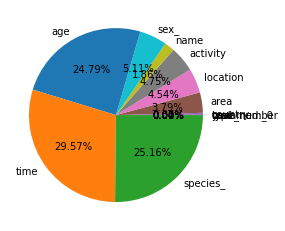

<Figure size 432x288 with 0 Axes>

In [12]:
# Con el código más sencillo de los apuntes

plt.figure()
plt.pie(x1, labels=y1, autopct = '%1.2f%%')
plt.show()

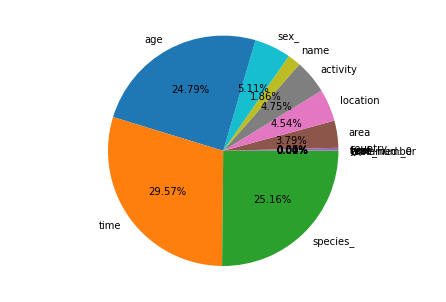

In [13]:
# Probando el codigo que ofrece la documentación, los resultados son muy similares
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(x1, labels = y1,autopct='%1.2f%%')
plt.show()

In [14]:
# Nos queda ver si podemos corregir la superposicion de labels o eliminar los nulos de la serie, serie[serie == 0] --> hacer un drop de esto

3. ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [26]:
describe = df.describe(include ='object').T
describe

,count,unique,top,freq
case_number,6113,6113,2018.06.25,1
type,6110,8,Unprovoked,4438
country,6074,201,USA,2200
area,5706,791,Florida,1025
location,5626,4020,"New Smyrna Beach, Volusia County",162
activity,5603,1484,Surfing,966
name,5914,5118,male,511
sex_,5564,6,M,4939
age,3448,156,17,154
time,2934,366,Afternoon,183


In [27]:
# Comprobamos lo que será nuestro eje x
describe.index

Index(['case_number', 'type', 'country', 'area', 'location', 'activity',
       'name', 'sex_', 'age', 'time', 'species_', 'href'],
      dtype='object')

In [38]:
# Comprobamos lo que será nuestro eje y
describe['unique']

case_number    6113
type              8
country         201
area            791
location       4020
activity       1484
name           5118
sex_              6
age             156
time            366
species_       1529
href           6099
Name: unique, dtype: object

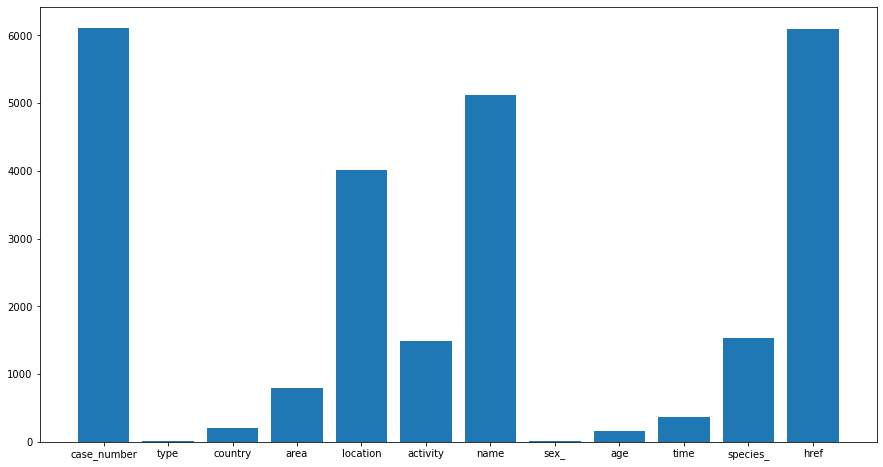

In [29]:
# Ampliamos la figura con figsize para que no se superpongan las etiquetas del eje x
plt.figure(figsize = (15, 8))
x = describe.index
y = describe['unique']
plt.bar(x,y)
plt.show()

In [36]:
# Otro método para sacar los valores únicos:
columnas = df.columns
columnas


Index(['case_number', 'unnamed:_0', 'year', 'type', 'country', 'area',
       'location', 'activity', 'name', 'sex_', 'age', 'time', 'species_',
       'href'],
      dtype='object')

In [37]:

uniques = []
for column in columnas:
    v = df[column].unique()
    w = len(v)
    uniques.append(w)

uniques

[6114, 6114, 207, 9, 202, 792, 4021, 1485, 5119, 7, 157, 367, 1530, 6099]

In [ ]:
# Con esta opción contamos los valores unicos de unnamed: 0 (que no haría falta porque es otro índice) y se incluyen los nulos de cada columna como valor único

4. Filtrad los datos para quedarnos solo con los datos de USA.


In [39]:
usa = df[df['country'] == 'USA']

* ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [43]:
usa2000 = usa[usa['year']>= 2000]
usa2000.head()

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
7,2018.05.27,7,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,NaN,"Lemon shark, 3'",http://sharkattackfile.net/spreadsheets/pdf_di...
8,2018.05.26.b,8,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,17h00,"Bull shark, 6'",http://sharkattackfile.net/spreadsheets/pdf_di...


In [44]:
# Para el conteo por año aplicamos un group by (aunque esto lo aprendimos depués)
## Tambien valdría con un value_counts()
usa2000.groupby('year')['case_number'].count()

year
2000.0    52
2001.0    58
2002.0    49
2003.0    57
2004.0    35
2005.0    52
2006.0    54
2007.0    66
2008.0    60
2009.0    41
2010.0    40
2011.0    48
2012.0    63
2013.0    59
2014.0    65
2015.0    73
2016.0    64
2017.0    65
2018.0    10
Name: case_number, dtype: int64

In [46]:
x = usa2000.groupby('year')['case_number'].count().values
y = usa2000.groupby('year')['case_number'].count().index

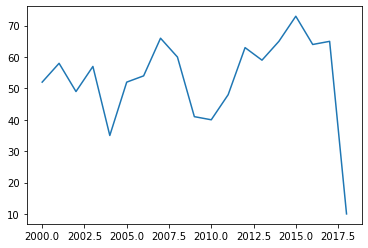

In [53]:
# Pensamos que con una gráfica lineal se puede ver la evolucion de los ataques en el tiempo
plt.figure()
plt.plot(y, x)
plt.show()

In [ ]:
# Al ser una variable numérica, la gráfica está mostrando los años como decimales divisibles.

* En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

In [21]:
usa2000['type'].value_counts()

Unprovoked      843
Invalid          68
Provoked         61
Boating          32
Boat              5
Sea Disaster      2
Name: type, dtype: int64

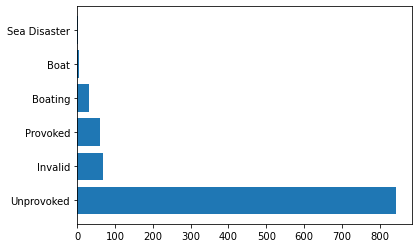

In [54]:
# En este caso creemos que el gráfico que mejor representa estos cálculos es el gráfico de barras, ya que tenemos una variable categórica y una numérica
x= usa2000['type'].value_counts().index
y= usa2000['type'].value_counts().values

plt.figure()
plt.barh(x, y)
plt.show()

5. Filtrad los datos para Spain:

In [22]:
spain = df[df['country'] == 'SPAIN']

* ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [23]:
spain2000 = spain[spain['year']>=2000]

In [63]:
x = spain2000['year'].value_counts().index.sort_values()
y = spain2000['year'].value_counts().values

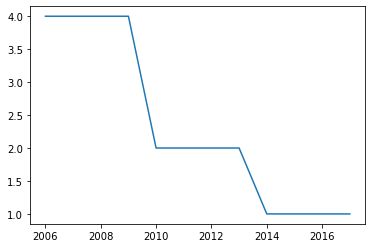

In [65]:
plt.figure()
plt.plot(x, y)
plt.show()

* En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

In [24]:
spain2000['type'].value_counts()

Unprovoked    9
Invalid       5
Provoked      2
Name: type, dtype: int64

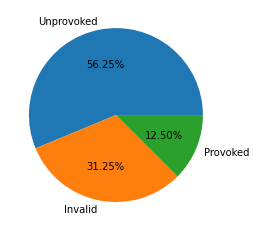

In [66]:
# Vamos a probar de nuevo con un piechart, que creemos que ilustra muy bien lo que se nos pide.
x = spain2000['type'].value_counts().values
y = spain2000['type'].value_counts().index

plt.figure()
plt.pie(x, labels=y, autopct = '%1.2f%%')
plt.show()